<a href="https://colab.research.google.com/github/ssaikoexe-cell/St-edo-kolsk-odborn-innost/blob/main/P_E_Minar%C4%8D%C3%ADkov%C3%A1__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile simulace.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    int pocet_strategii = 30;  //30 hráčů
    int strategie[30];
    int akce[30][5];
    float skore[30];
    int i, j, k, kolo;
    int kol = 10000; // 10 000 kol neboť chceme zobrazit opravdu dlouhodobou dynamiku
    int T = 50;     // interakce každé dvojce v jedné společné hře
    int payoff[2][2] = {{4, 0}, {5, 1}}; // matice: SS (4,4), SZ (0,5), ZS (5,0), ZZ (1,1)

    srand(time(NULL));

    // Inicializace
    for (i = 0; i < pocet_strategii; i++) {
        strategie[i] = rand() % 32; //náhodně vybere pocet_strategii z čísel 0-31
        skore[i] = 0;
        for (k = 0; k < 5; k++)     // převede na jejich bitové reprezentace - vytvoření hráčů jako automatů s individuálními strategiemi
            akce[i][4 - k] = (strategie[i] >> k) & 1;
    }

    // výpis do tabulky
    printf("Kolo,Strategie_ID,Skore\n");

    for (kolo = 0; kolo < kol; kolo++) {

    // Turnaj
        for (i = 0; i < pocet_strategii; i++) {
            for (j = i + 1; j < pocet_strategii; j++) {
                int stav = 0;
                for (k = 0; k < T; k++) {
                    int akceA = akce[i][stav];
                    int akceB = akce[j][stav];
                    skore[i] += payoff[akceA][akceB];       // výplaty hráčů za každou interakci
                    skore[j] += payoff[akceB][akceA];
                    if (akceA == 0 && akceB == 0) stav = 1; // umožňuje přesuny na pozice v množině akcí podle funkce turnaje
                    else if (akceA == 0 && akceB == 1) stav = 2;
                    else if (akceA == 1 && akceB == 0) stav = 3;
                    else stav = 4;
                }
            }
        }

        // Výpis dat pouze po 10 kolech pro lepší orientaci v konečné tabulce výsledků a zvýšení rychlosti modelu
        if ((kolo + 1) % 10 == 0) {
            for (i = 0; i < pocet_strategii; i++) {
                printf("%d,%d,%.0f\n", kolo + 1, strategie[i], skore[i]);
            }
        }

//Eliminace a duplikace
if (kolo % 5 == 0 && kolo > 0) { //eliminace nejhorších a namnožení nejlepších strategií se děje po každých 5 kolech neboť je potřeba dát novým strategiím čas se projevit a získat dostatečný zisk

    int min_idx = 0, max_idx = 0;
    for (i = 1; i < pocet_strategii; i++) {
        if (skore[i] < skore[min_idx]) min_idx = i;
        if (skore[i] > skore[max_idx]) max_idx = i;
    }
    strategie[min_idx] = strategie[max_idx];
    for (k = 0; k < 5; k++) akce[min_idx][k] = akce[max_idx][k];

//Mutace
    for (int m = 0; m < 2; m++) { //mutují dva náhodně vybraní hráči
        int r_idx = rand() % pocet_strategii;
        strategie[r_idx] = rand() % 32;
        for (k = 0; k < 5; k++) akce[r_idx][4 - k] = (strategie[r_idx] >> k) & 1;
    }

//vynulování skóre
    for (i = 0; i < pocet_strategii; i++) skore[i] = 0;
}
        for (i = 0; i < pocet_strategii; i++) skore[i] = 0;
    }
    return 0;
}

Writing simulace.c


In [ ]:
!gcc simulace.c -o simulace
!./simulace > vysledky.csv

Filtrovaná tabulka byla uložena jako 'vysledky_filtrovane.csv'.
Vybrané strategie: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Kolo,10,20,30,40,50,60,70,80,90,100,...,9910,9920,9930,9940,9950,9960,9970,9980,9990,10000
Strategie_ID,,,,,,,,,,,,,,,,,,,,,
0,2684.000000,2396.0,2208.0,2604.000000,NaN,NaN,NaN,3408.000000,3912.000000,4308.000000,...,5200.0,5400.0,5696.000000,5600.000000,5200.000000,4896.000000,4396.000000,4792.000000,4496.000000,4396.000000
1,2396.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3708.000000,4012.000000,...,5200.0,5400.0,5696.000000,5504.000000,5296.000000,5092.000000,4496.000000,4500.000000,4596.000000,4692.000000
2,3373.000000,3102.0,3258.0,3400.000000,3139.000000,3306.0,3664.0,NaN,NaN,NaN,...,5225.0,5450.0,5697.000000,5553.000000,5125.000000,4921.000000,4518.000000,4724.500000,4735.000000,4563.500000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3568.000000,4072.000000,4471.000000,...,5249.0,5473.5,5697.000000,5613.000000,5304.333333,5100.333333,4559.666667,4737.333333,4701.000000,4634.333333
4,NaN,NaN,NaN,2932.000000,2816.000000,3112.0,3447.0,3623.000000,4109.000000,NaN,...,5200.0,5400.0,5600.000000,5600.000000,5200.000000,NaN,NaN,NaN,NaN,NaN
5,3055.000000,2986.0,2942.0,3114.000000,3134.000000,3437.0,3716.0,3916.000000,4370.000000,4404.000000,...,5298.0,5400.0,5720.000000,5600.000000,5270.000000,5237.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4348.000000,4546.000000,...,5275.0,5450.0,5761.000000,5745.000000,5482.400000,5321.250000,5092.250000,5118.250000,4883.000000,4733.333333
7,NaN,4852.0,4857.0,4674.600000,4371.666667,4934.5,4807.8,4631.818182,5081.333333,5083.230769,...,5347.0,5498.0,5821.307692,5699.133333,5634.666667,5496.000000,5147.272727,5203.727273,5012.090909,4840.727273
8,2673.666667,2235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


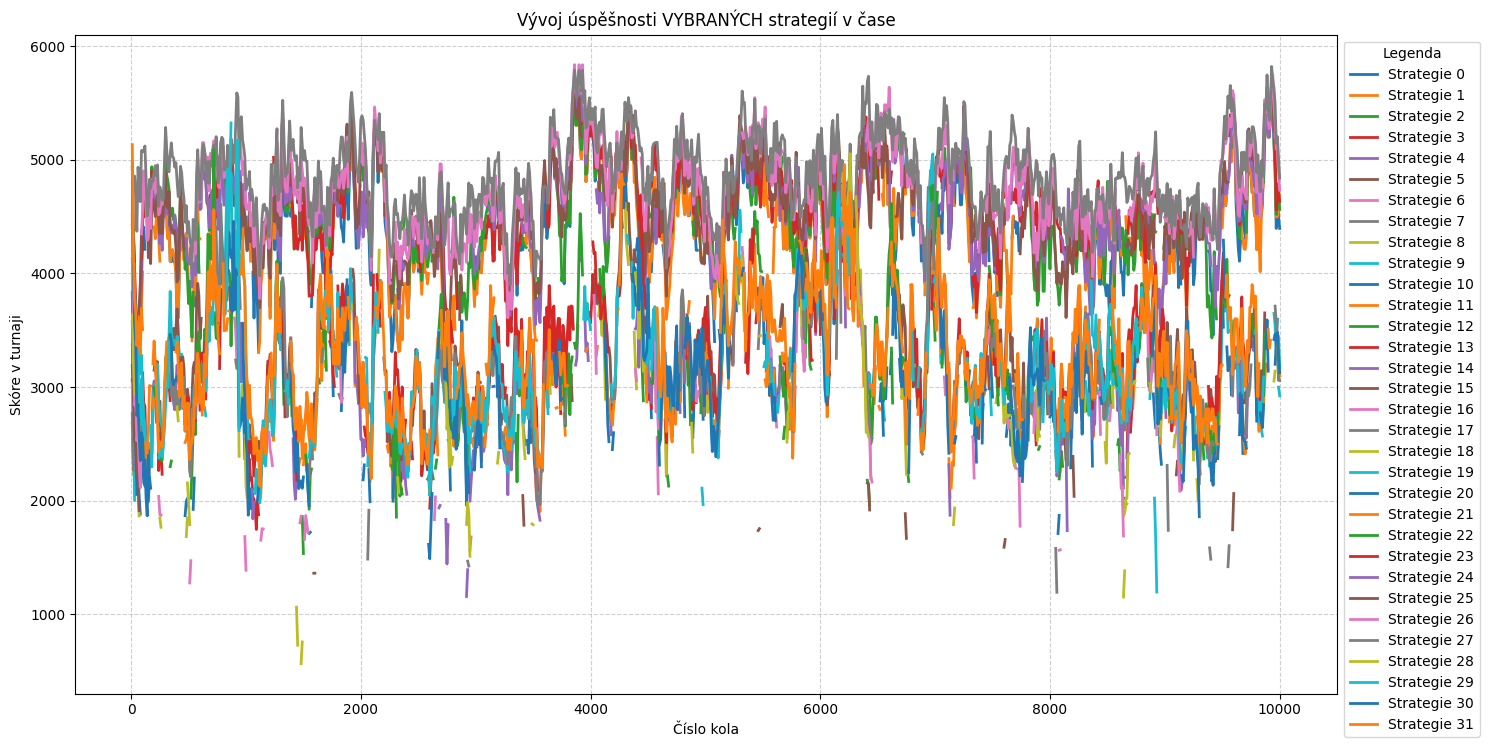

In [ ]:
# Kód pro vytvoření tabulky a grafu výsledků
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = 'vysledky.csv'
if not os.path.exists(file_path):
    print(f"Chyba, soubor '{file_path}' nalezen")
    raise FileNotFoundError(f"Missing required data file: {file_path}. Please run previous cells to generate it.")
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Při čtení CSV souboru došlo k chybě: {e}")
    raise

# Vytvoření tabulky
tabulka = df.pivot_table(index='Strategie_ID', columns='Kolo', values='Skore', aggfunc='mean')

# Seznam strategií které chceme zobrazit:
vybrane_strategie = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31
]
tabulka_filtr = tabulka.loc[tabulka.index.isin(vybrane_strategie)]
tabulka_filtr.to_excel('vybrane_strategie.xlsx')
tabulka_filtr.to_csv('vysledky_filtrovane.csv', encoding='utf-8', sep=',')
print("Filtrovaná tabulka byla uložena jako 'vysledky_filtrovane.csv'.")

print(f"Vybrané strategie: {vybrane_strategie}")
display(tabulka_filtr)

# Graf
plt.figure(figsize=(15, 8))

for strat in tabulka_filtr.index:
    plt.plot(tabulka_filtr.columns, tabulka_filtr.loc[strat], label=f'Strategie {strat}', linewidth=2)

plt.title('Vývoj úspěšnosti VYBRANÝCH strategií v čase')
plt.xlabel('Číslo kola')
plt.ylabel('Skóre v turnaji')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Legenda", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('vyvoj_strategii.png')
plt.show()

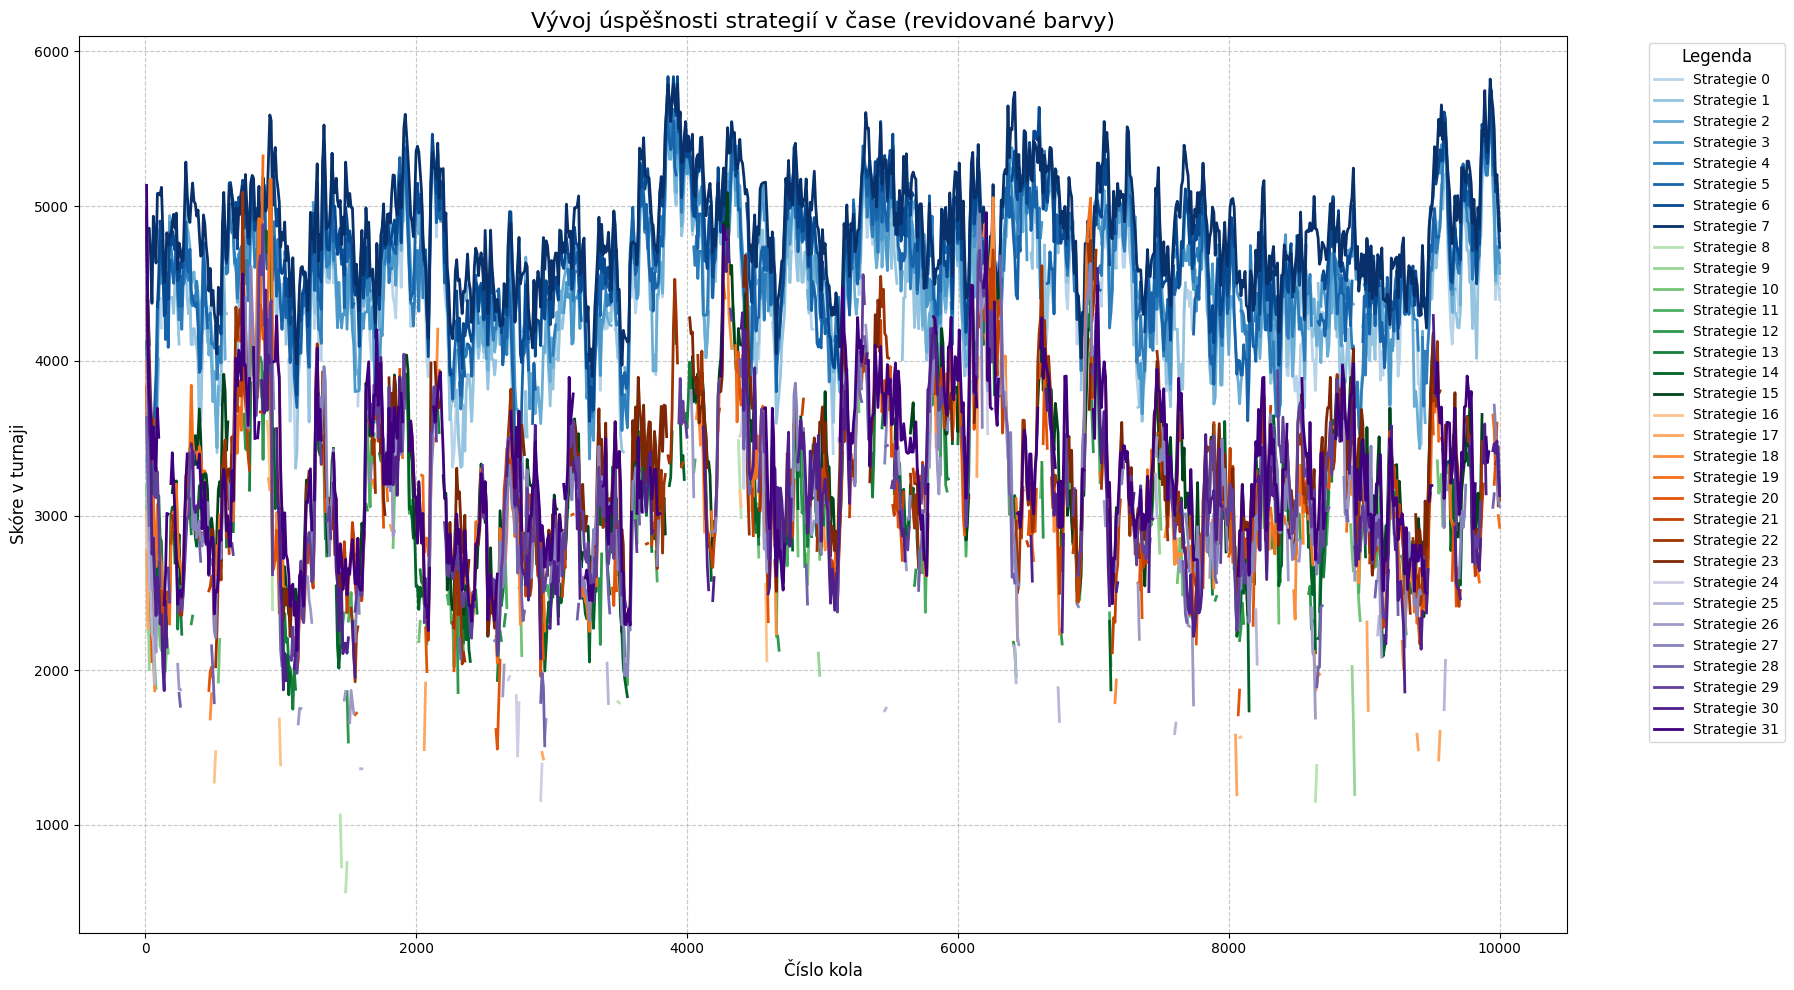

In [ ]:
# Kód pro další graf rozlišující strategie podle barev jejich skupin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(18, 10))

# dělení skupin: 00* modré, 01* zelené, 10* oranžové, 11* fialové
colors_blue = plt.colormaps['Blues']
colors_green = plt.colormaps['Greens']
colors_orange = plt.colormaps['Oranges']
colors_purple = plt.colormaps['Purples']

for strat in tabulka_filtr.index:     # modré: strategie s čísly 0-7
    color = None
    if 0 <= strat <= 7:
        norm_val = (strat - 0) / 7.0
        color = colors_blue(norm_val * 0.7 + 0.3)
    elif 8 <= strat <= 15:            # zelené: strategie s čísly 8-15
        norm_val = (strat - 8) / 7.0
        color = colors_green(norm_val * 0.7 + 0.3)
    elif 16 <= strat <= 23:           # oranžové: strategie s čísly 16-23
        norm_val = (strat - 16) / 7.0
        color = colors_orange(norm_val * 0.7 + 0.3)
    elif 24 <= strat <= 31:           # fialové: strategie s čísly 24-31
        norm_val = (strat - 24) / 7.0
        color = colors_purple(norm_val * 0.7 + 0.3)
    plt.plot(tabulka_filtr.columns, tabulka_filtr.loc[strat], label=f'Strategie {strat}', linewidth=2, color=color)

plt.title('Vývoj úspěšnosti strategií v čase (revidované barvy)', fontsize=16)
plt.xlabel('Číslo kola', fontsize=12)
plt.ylabel('Skóre v turnaji', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Legenda", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.savefig('vyvoj_strategii_revised_colors.png')
plt.show()
plt.close()